Here's a data-wrangling gotcha that bit me quite badly recently.

The setting is somewhat niche: x-values are stored as json keys 
while y-values are stored as json values. Since json stores keys only as strings 
(https://stackoverflow.com/questions/1450957/pythons-json-module-converts-int-dictionary-keys-to-strings/1451857#1451857), 
one can easily end up creating python variables where the x-values are strings and the y-values are not after ingesting the json data. 
Matplotlib will happily plot string data along the x-axis, but apparently not sensibly when the keys are not ordered, 
as is often the case in json data/hash maps. 

The result is a garbage plot: 



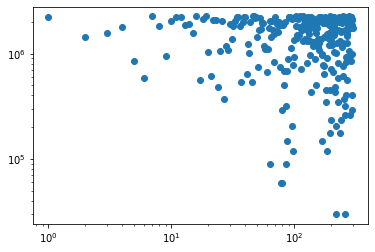

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import random 

def create_data():
  xs = np.arange(1, 300, 1)
  ys = 1e2*xs*(300 - xs)
  pairs = list(zip(xs, ys))
  random.shuffle(pairs)
  xs, ys = zip(*pairs)
  return [str(x) for x in xs], ys

def plot(xs, ys):
  plt.scatter(xs, ys)
  plt.xscale('log')
  plt.yscale('log')

def cast_as_int(xs, ys):
  return [int(x) for x in xs], ys

# garbage plot 
plot(*create_data())

The remedy is simple: cast strings as ints. 


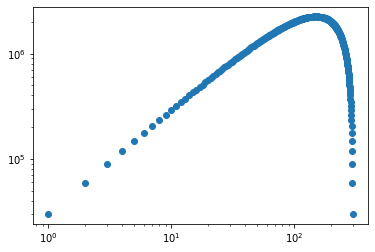

In [3]:
# correct plot
plot(*cast_as_int(*create_data()))